# 数据分析

这是关于TMDB5000条电影数据的分析报告

数据来源于Kaggle https://www.kaggle.com/tmdb/tmdb-movie-metadata

分析报告分为：

- 提出问题

- 认识数据

- 清洗数据

- 分析数据

- 总结

## 1. 提出问题

1. 对电影类型的分析，电影类型主要有哪些，哪些电影类型数量最多，电影类型随时间的变化，哪些电影的票房/利润多，观众更喜欢那种类型的电影

2. 电影票房与哪些因素相关，电影受欢迎程度的分析

3. Universal Pictures和Paramount Pictures这两个公司产出电影的情况对比

4. 对电影导演，突出关键字，电影时长，电影产出地的情况进行分析

5. 原创电影和非原创电影的分析

## 2. 认识数据

从 https://www.kaggle.com/tmdb/tmdb-movie-metadata 下载数据集

- 有 tmdb_5000_credits.csv 和 tmdb_5000_movies.csv 这两个数据集，描述电影演员相关信息和每部电影的基本信息



In [1]:
# 导入数据包
import pandas as pd
import numpy as np
import json

# 加载可视化包
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline

# 加载词云图
from wordcloud import WordCloud

# 设置显示选项
# pd.set_option('display.max_columns', 8)
pd.set_option('display.max_rows', 8)

# 取消限制，比如设置为None。
pd.options.display.max_columns = None

/home/miaopei/anaconda2/envs/cat_vs_dog/lib/python3.5/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')
/home/miaopei/anaconda2/envs/cat_vs_dog/lib/python3.5/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


**中文显示问题：**

> [python matplotlib 中文显示参数设置](https://segmentfault.com/a/1190000005144275)

> [用 matplotlib 画图无法显示中文问题的根源及解决方案](https://foofish.net/matplotlib_mess.html)

用 pandas 或者 matplotlib 画图时，遇到中文时会显示出乱码

分析其原因，matplotlib 初始化时首先要加载配置文件，配置文件的名字叫 matplotlibrc，字体设置也在这个配置文件中，之所有无法正常显示中文是因为 matplotlib 默认不支持中文字体，解决的办法是我们需要在配置文件中指定一个 matplotlib 可用的中文字体。

**第一步：下载中文字体**

在网站下载 [SimHei 字体](http://www.fontpalace.com/font-details/SimHei/)，该字体即有Windows字体也有Mac字体。下载后双击打开安装字体

**第二步：找到配置文件 matplotlibrc**

找到 matplotlib 加载的配置文件路径可以通过如下方式：

    matplotlib.matplotlib_fname() 
    
编辑 matplotlibrc 文件，找到 font.family 和 font.sans-serif 这两行，去掉注释，并添加 SimHei 字体到 font.sans-serif 中，如下：

    font.family         : sans-serif
    font.sans-serif     : SimHei, DejaVu Sans, Bitstream Vera Sans, Lucida Grande, Verdana, Geneva, Lucid, Arial, Helvetica, Avant Garde, sans-serif

**第三步：删除缓冲目录**

    rm ~/.cache/matplotlib/fontList.py3k.cache
    
**第四步：重启jupyter notebook**

如果你是在 ipython 环境下画图就重启 ipython，如果时 juypter notebook 画图 就重新 juypter notebook。

In [2]:
# 将会获得 matplotlib 包所在文件夹
matplotlib.matplotlib_fname() 

'/home/miaopei/anaconda2/envs/cat_vs_dog/lib/python3.5/site-packages/matplotlib/mpl-data/matplotlibrc'

In [3]:
# -*- coding: utf-8 -*-
# 用来正常显示中文标签
plt.rcParams['font.sans-serif'] = ['SimHei']

# 用来正常显示负号
plt.rcParams['axes.unicode_minus'] = False  

In [4]:
%ls tmdb_5000_movies-dataset/

tmdb_5000_credits.csv  tmdb_5000_movies.csv


In [5]:
# 读取演员列表信息和电影列表信息数据
credits = pd.read_csv('tmdb_5000_movies-dataset/tmdb_5000_credits.csv', encoding='utf_8')
movies = pd.read_csv('tmdb_5000_movies-dataset/tmdb_5000_movies.csv', encoding='utf_8')

In [6]:
#查看详细信息
credits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 4 columns):
movie_id    4803 non-null int64
title       4803 non-null object
cast        4803 non-null object
crew        4803 non-null object
dtypes: int64(1), object(3)
memory usage: 150.2+ KB


In [7]:
credits

,movie_id,title,cast,crew
0,19995,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,285,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,206647,Spectre,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,49026,The Dark Knight Rises,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
...,...,...,...,...
4799,72766,Newlyweds,"[{""cast_id"": 1, ""character"": ""Buzzy"", ""credit_...","[{""credit_id"": ""52fe487dc3a368484e0fb013"", ""de..."
4800,231617,"Signed, Sealed, Delivered","[{""cast_id"": 8, ""character"": ""Oliver O\u2019To...","[{""credit_id"": ""52fe4df3c3a36847f8275ecf"", ""de..."
4801,126186,Shanghai Calling,"[{""cast_id"": 3, ""character"": ""Sam"", ""credit_id...","[{""credit_id"": ""52fe4ad9c3a368484e16a36b"", ""de..."
4802,25975,My Date with Drew,"[{""cast_id"": 3, ""character"": ""Herself"", ""credi...","[{""credit_id"": ""58ce021b9251415a390165d9"", ""de..."


In [8]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 20 columns):
budget                  4803 non-null int64
genres                  4803 non-null object
homepage                1712 non-null object
id                      4803 non-null int64
keywords                4803 non-null object
original_language       4803 non-null object
original_title          4803 non-null object
overview                4800 non-null object
popularity              4803 non-null float64
production_companies    4803 non-null object
production_countries    4803 non-null object
release_date            4802 non-null object
revenue                 4803 non-null int64
runtime                 4801 non-null float64
spoken_languages        4803 non-null object
status                  4803 non-null object
tagline                 3959 non-null object
title                   4803 non-null object
vote_average            4803 non-null float64
vote_count              4803 non-null 

In [9]:
movies

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4799,9000,"[{""id"": 35, ""name"": ""Comedy""}, {""id"": 10749, ""...",NaN,72766,[],en,Newlyweds,A newlywed couple's honeymoon is upended by th...,0.642552,[],[],2011-12-26,0,85.0,[],Released,A newlywed couple's honeymoon is upended by th...,Newlyweds,5.9,5
4800,0,"[{""id"": 35, ""name"": ""Comedy""}, {""id"": 18, ""nam...",http://www.hallmarkchannel.com/signedsealeddel...,231617,"[{""id"": 248, ""name"": ""date""}, {""id"": 699, ""nam...",en,"Signed, Sealed, Delivered","""Signed, Sealed, Delivered"" introduces a dedic...",1.444476,"[{""name"": ""Front Street Pictures"", ""id"": 3958}...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2013-10-13,0,120.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,NaN,"Signed, Sealed, Delivered",7.0,6
4801,0,[],http://shanghaicalling.com/,126186,[],en,Shanghai Calling,When ambitious New York attorney Sam is sent t...,0.857008,[],"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-05-03,0,98.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,A New Yorker in Shanghai,Shanghai Calling,5.7,7
4802,0,"[{""id"": 99, ""name"": ""Documentary""}]",NaN,25975,"[{""id"": 1523, ""name"": ""obsession""}, {""id"": 224...",en,My Date with Drew,Ever since the second grade when he first saw ...,1.929883,"[{""name"": ""rusty bear entertainment"", ""id"": 87...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2005-08-05,0,90.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,NaN,My Date with Drew,6.3,16


## 3. 数据清洗

### 3.1 格式转化

- credits 数据中 cast、crew 都是 json 的格式，需要将演员、导演读取出来，以字符串格式显示

- movies 数据中 genres、keywords、production_companies、production_countries、spoken_languages 也是 json 格式，需要转化成字符串

**1. credits json 解析**

In [10]:
# 数据的json格式是[{},{}]
json_cols = ['cast', 'crew']

# 应用json.loads,
# 编码：把一个 Python 对象编码转换成 Json 字符串   json.dumps()
# 解码：把 Json 格式字符串解码转换成 Python 对象   json.loads()
for i in json_cols:
    credits[i] = credits[i].apply(json.loads)
    
# 用json方法汇总所有类型
def get_names(x):
    return ','.join([i['name'] for i in x])
#i['name']提取name后的名字 以逗号分隔
#join()：连接字符串数组。将字符串、元组、列表中的元素以指定的字符(分隔符)连接生成一个新的字符串
#'sep'.join(seq)

In [11]:
#cast  提取演员
credits['cast'] = credits['cast'].apply(get_names)
credits.head()

,movie_id,title,cast,crew
0,19995,Avatar,"Sam Worthington,Zoe Saldana,Sigourney Weaver,S...","[{'gender': 0, 'id': 1721, 'name': 'Stephen E...."
1,285,Pirates of the Caribbean: At World's End,"Johnny Depp,Orlando Bloom,Keira Knightley,Stel...","[{'gender': 2, 'id': 120, 'name': 'Dariusz Wol..."
2,206647,Spectre,"Daniel Craig,Christoph Waltz,Léa Seydoux,Ralph...","[{'gender': 2, 'id': 153, 'name': 'Thomas Newm..."
3,49026,The Dark Knight Rises,"Christian Bale,Michael Caine,Gary Oldman,Anne ...","[{'gender': 2, 'id': 947, 'name': 'Hans Zimmer..."
4,49529,John Carter,"Taylor Kitsch,Lynn Collins,Samantha Morton,Wil...","[{'gender': 2, 'id': 7, 'name': 'Andrew Stanto..."


In [12]:
# crew 提取导演 director
def director(x):
    for i in x:
        if i['job'] == 'Director':  # 判断 director
            return i['name']
credits['crew'] = credits['crew'].apply(director) 
credits.head()

,movie_id,title,cast,crew
0,19995,Avatar,"Sam Worthington,Zoe Saldana,Sigourney Weaver,S...",James Cameron
1,285,Pirates of the Caribbean: At World's End,"Johnny Depp,Orlando Bloom,Keira Knightley,Stel...",Gore Verbinski
2,206647,Spectre,"Daniel Craig,Christoph Waltz,Léa Seydoux,Ralph...",Sam Mendes
3,49026,The Dark Knight Rises,"Christian Bale,Michael Caine,Gary Oldman,Anne ...",Christopher Nolan
4,49529,John Carter,"Taylor Kitsch,Lynn Collins,Samantha Morton,Wil...",Andrew Stanton


In [13]:
# 将字段‘crew’改为‘director’
credits.rename(columns = {'crew':'director'}, inplace = True)
credits.head()

,movie_id,title,cast,director
0,19995,Avatar,"Sam Worthington,Zoe Saldana,Sigourney Weaver,S...",James Cameron
1,285,Pirates of the Caribbean: At World's End,"Johnny Depp,Orlando Bloom,Keira Knightley,Stel...",Gore Verbinski
2,206647,Spectre,"Daniel Craig,Christoph Waltz,Léa Seydoux,Ralph...",Sam Mendes
3,49026,The Dark Knight Rises,"Christian Bale,Michael Caine,Gary Oldman,Anne ...",Christopher Nolan
4,49529,John Carter,"Taylor Kitsch,Lynn Collins,Samantha Morton,Wil...",Andrew Stanton


**2. movies json 解析**

In [14]:
# json 解析
json_cols = [ 'genres', 'keywords', 'spoken_languages', 'production_countries', 'production_companies']

for i in json_cols:
    movies[i] = movies[i].apply(json.loads)
    
# 用 json 方法汇总所有类型
def get_names(x):
    return ','.join([i['name'] for i in x])

#应用于每个字段
movies['genres'] = movies['genres'].apply(get_names)
movies['keywords'] = movies['keywords'].apply(get_names)
movies['spoken_languages'] = movies['spoken_languages'].apply(get_names)
movies['production_countries'] = movies['production_countries'].apply(get_names)
movies['production_companies'] = movies['production_companies'].apply(get_names)

In [15]:
movies.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"Action,Adventure,Fantasy,Science Fiction",http://www.avatarmovie.com/,19995,"culture clash,future,space war,space colony,so...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"Ingenious Film Partners,Twentieth Century Fox ...","United States of America,United Kingdom",2009-12-10,2787965087,162.0,"English,Español",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"Adventure,Fantasy,Action",http://disney.go.com/disneypictures/pirates/,285,"ocean,drug abuse,exotic island,east india trad...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"Walt Disney Pictures,Jerry Bruckheimer Films,S...",United States of America,2007-05-19,961000000,169.0,English,Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"Action,Adventure,Crime",http://www.sonypictures.com/movies/spectre/,206647,"spy,based on novel,secret agent,sequel,mi6,bri...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"Columbia Pictures,Danjaq,B24","United Kingdom,United States of America",2015-10-26,880674609,148.0,"Français,English,Español,Italiano,Deutsch",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"Action,Crime,Drama,Thriller",http://www.thedarkknightrises.com/,49026,"dc comics,crime fighter,terrorist,secret ident...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"Legendary Pictures,Warner Bros.,DC Entertainme...",United States of America,2012-07-16,1084939099,165.0,English,Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"Action,Adventure,Science Fiction",http://movies.disney.com/john-carter,49529,"based on novel,mars,medallion,space travel,pri...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,Walt Disney Pictures,United States of America,2012-03-07,284139100,132.0,English,Released,"Lost in our world, found in another.",John Carter,6.1,2124


### 3.2 合并数据

- credits 和 movies 中都有 movie_id 和 title, 检查这两个字段是否是相同的

In [16]:
(credits['movie_id'] == movies['id']).describe()

count     4803
unique       1
top       True
freq      4803
dtype: object

In [17]:
(credits['title'] == movies['title']).describe()

count     4803
unique       1
top       True
freq      4803
Name: title, dtype: object

可以看出这两个字段是相同的，将 movies 的 title 删掉

- 方法一：直接 del df['column-name']

- 方法二：采用 drop 方法，有下面三种等价的表达式：

  - df = df.drop('column_name', 1)；

  - df.drop('column_name',axis=1, inplace=True)

  - df.drop(df.columns[ : ], axis=1, inplace=True)

In [18]:
del movies['title']

In [19]:
# 合并两张表
df = credits.merge(right=movies, how='inner', left_on='movie_id', right_on='id')
df.head()

,movie_id,title,cast,director,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,vote_average,vote_count
0,19995,Avatar,"Sam Worthington,Zoe Saldana,Sigourney Weaver,S...",James Cameron,237000000,"Action,Adventure,Fantasy,Science Fiction",http://www.avatarmovie.com/,19995,"culture clash,future,space war,space colony,so...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"Ingenious Film Partners,Twentieth Century Fox ...","United States of America,United Kingdom",2009-12-10,2787965087,162.0,"English,Español",Released,Enter the World of Pandora.,7.2,11800
1,285,Pirates of the Caribbean: At World's End,"Johnny Depp,Orlando Bloom,Keira Knightley,Stel...",Gore Verbinski,300000000,"Adventure,Fantasy,Action",http://disney.go.com/disneypictures/pirates/,285,"ocean,drug abuse,exotic island,east india trad...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"Walt Disney Pictures,Jerry Bruckheimer Films,S...",United States of America,2007-05-19,961000000,169.0,English,Released,"At the end of the world, the adventure begins.",6.9,4500
2,206647,Spectre,"Daniel Craig,Christoph Waltz,Léa Seydoux,Ralph...",Sam Mendes,245000000,"Action,Adventure,Crime",http://www.sonypictures.com/movies/spectre/,206647,"spy,based on novel,secret agent,sequel,mi6,bri...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"Columbia Pictures,Danjaq,B24","United Kingdom,United States of America",2015-10-26,880674609,148.0,"Français,English,Español,Italiano,Deutsch",Released,A Plan No One Escapes,6.3,4466
3,49026,The Dark Knight Rises,"Christian Bale,Michael Caine,Gary Oldman,Anne ...",Christopher Nolan,250000000,"Action,Crime,Drama,Thriller",http://www.thedarkknightrises.com/,49026,"dc comics,crime fighter,terrorist,secret ident...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"Legendary Pictures,Warner Bros.,DC Entertainme...",United States of America,2012-07-16,1084939099,165.0,English,Released,The Legend Ends,7.6,9106
4,49529,John Carter,"Taylor Kitsch,Lynn Collins,Samantha Morton,Wil...",Andrew Stanton,260000000,"Action,Adventure,Science Fiction",http://movies.disney.com/john-carter,49529,"based on novel,mars,medallion,space travel,pri...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,Walt Disney Pictures,United States of America,2012-03-07,284139100,132.0,English,Released,"Lost in our world, found in another.",6.1,2124


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4803 entries, 0 to 4802
Data columns (total 23 columns):
movie_id                4803 non-null int64
title                   4803 non-null object
cast                    4803 non-null object
director                4773 non-null object
budget                  4803 non-null int64
genres                  4803 non-null object
homepage                1712 non-null object
id                      4803 non-null int64
keywords                4803 non-null object
original_language       4803 non-null object
original_title          4803 non-null object
overview                4800 non-null object
popularity              4803 non-null float64
production_companies    4803 non-null object
production_countries    4803 non-null object
release_date            4802 non-null object
revenue                 4803 non-null int64
runtime                 4801 non-null float64
spoken_languages        4803 non-null object
status                  4803 non-null ob

df 中有 23 个字段，分别为：

- movie_id : TMDB电影标识号

- title : 电影名称

- cast ：演员列表

- director ：导演

- budget ：预算（美元）

- genres ：风格列表，电影类型

- homepage ：电影首页的 URL

- id ：标识号

- keywords：关键词

- original_language ：电影语言

- original_title ：电影名称

- overview ：剧情摘要

- popularity ：在 Movie Database 上的相对页面查看次数

- production_companies ：制作公司

- production_countries ：制作国家

- release_date ：上映时间

- revenue ：收入

- runtime ：电影时长

- spoken_languages ：口语

- status ：状态

- tagline ：电影的标语

- vote_average ：平均评分

- vote_count ：评分次数

### 3.3 字段及缺失值处理

In [21]:
# 删除不必要字段
del df['id']
del df['homepage']
del df['original_title']
del df['overview']
del df['spoken_languages']
del df['tagline']
df.head()

,movie_id,title,cast,director,budget,genres,keywords,original_language,popularity,production_companies,production_countries,release_date,revenue,runtime,status,vote_average,vote_count
0,19995,Avatar,"Sam Worthington,Zoe Saldana,Sigourney Weaver,S...",James Cameron,237000000,"Action,Adventure,Fantasy,Science Fiction","culture clash,future,space war,space colony,so...",en,150.437577,"Ingenious Film Partners,Twentieth Century Fox ...","United States of America,United Kingdom",2009-12-10,2787965087,162.0,Released,7.2,11800
1,285,Pirates of the Caribbean: At World's End,"Johnny Depp,Orlando Bloom,Keira Knightley,Stel...",Gore Verbinski,300000000,"Adventure,Fantasy,Action","ocean,drug abuse,exotic island,east india trad...",en,139.082615,"Walt Disney Pictures,Jerry Bruckheimer Films,S...",United States of America,2007-05-19,961000000,169.0,Released,6.9,4500
2,206647,Spectre,"Daniel Craig,Christoph Waltz,Léa Seydoux,Ralph...",Sam Mendes,245000000,"Action,Adventure,Crime","spy,based on novel,secret agent,sequel,mi6,bri...",en,107.376788,"Columbia Pictures,Danjaq,B24","United Kingdom,United States of America",2015-10-26,880674609,148.0,Released,6.3,4466
3,49026,The Dark Knight Rises,"Christian Bale,Michael Caine,Gary Oldman,Anne ...",Christopher Nolan,250000000,"Action,Crime,Drama,Thriller","dc comics,crime fighter,terrorist,secret ident...",en,112.312950,"Legendary Pictures,Warner Bros.,DC Entertainme...",United States of America,2012-07-16,1084939099,165.0,Released,7.6,9106
4,49529,John Carter,"Taylor Kitsch,Lynn Collins,Samantha Morton,Wil...",Andrew Stanton,260000000,"Action,Adventure,Science Fiction","based on novel,mars,medallion,space travel,pri...",en,43.926995,Walt Disney Pictures,United States of America,2012-03-07,284139100,132.0,Released,6.1,2124


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4803 entries, 0 to 4802
Data columns (total 17 columns):
movie_id                4803 non-null int64
title                   4803 non-null object
cast                    4803 non-null object
director                4773 non-null object
budget                  4803 non-null int64
genres                  4803 non-null object
keywords                4803 non-null object
original_language       4803 non-null object
popularity              4803 non-null float64
production_companies    4803 non-null object
production_countries    4803 non-null object
release_date            4802 non-null object
revenue                 4803 non-null int64
runtime                 4801 non-null float64
status                  4803 non-null object
vote_average            4803 non-null float64
vote_count              4803 non-null int64
dtypes: float64(3), int64(4), object(10)
memory usage: 675.4+ KB


可以看出 director、release_date、runtime 分别有 30、1、2 个缺失值，这里只处理 release_date、runtime 的缺失值

In [23]:
df['release_date'] = df['release_date'].fillna('2014-06-01')  #网上查询填充
df['runtime'] = df['runtime'].fillna(df.runtime.mean())  #填充平均值
df[df[['release_date','runtime']].isnull().values == True]  #查看是否还有缺失值
df.head()

,movie_id,title,cast,director,budget,genres,keywords,original_language,popularity,production_companies,production_countries,release_date,revenue,runtime,status,vote_average,vote_count
0,19995,Avatar,"Sam Worthington,Zoe Saldana,Sigourney Weaver,S...",James Cameron,237000000,"Action,Adventure,Fantasy,Science Fiction","culture clash,future,space war,space colony,so...",en,150.437577,"Ingenious Film Partners,Twentieth Century Fox ...","United States of America,United Kingdom",2009-12-10,2787965087,162.0,Released,7.2,11800
1,285,Pirates of the Caribbean: At World's End,"Johnny Depp,Orlando Bloom,Keira Knightley,Stel...",Gore Verbinski,300000000,"Adventure,Fantasy,Action","ocean,drug abuse,exotic island,east india trad...",en,139.082615,"Walt Disney Pictures,Jerry Bruckheimer Films,S...",United States of America,2007-05-19,961000000,169.0,Released,6.9,4500
2,206647,Spectre,"Daniel Craig,Christoph Waltz,Léa Seydoux,Ralph...",Sam Mendes,245000000,"Action,Adventure,Crime","spy,based on novel,secret agent,sequel,mi6,bri...",en,107.376788,"Columbia Pictures,Danjaq,B24","United Kingdom,United States of America",2015-10-26,880674609,148.0,Released,6.3,4466
3,49026,The Dark Knight Rises,"Christian Bale,Michael Caine,Gary Oldman,Anne ...",Christopher Nolan,250000000,"Action,Crime,Drama,Thriller","dc comics,crime fighter,terrorist,secret ident...",en,112.312950,"Legendary Pictures,Warner Bros.,DC Entertainme...",United States of America,2012-07-16,1084939099,165.0,Released,7.6,9106
4,49529,John Carter,"Taylor Kitsch,Lynn Collins,Samantha Morton,Wil...",Andrew Stanton,260000000,"Action,Adventure,Science Fiction","based on novel,mars,medallion,space travel,pri...",en,43.926995,Walt Disney Pictures,United States of America,2012-03-07,284139100,132.0,Released,6.1,2124


## 4. 数据分析及可视化

### 4.1 关于电影类型的分析

**1. 获取电影类型**

In [24]:
df['genres'][1].split(',') # split 分隔字符串

['Adventure', 'Fantasy', 'Action']

In [25]:
# set() 函数创建一个无序不重复元素集，可进行关系测试，删除重复数据，还可以计算交集、差集、并集等
# 创建一个 set()
# 创建一个循环
# union(联合)取并集 set(a).union(b)

In [26]:
genre = set()
for i in df['genres'].str.split(','):
    genre = set().union(i, genre)

In [27]:
genre

{'',
 'Action',
 'Adventure',
 'Animation',
 'Comedy',
 'Crime',
 'Documentary',
 'Drama',
 'Family',
 'Fantasy',
 'Foreign',
 'History',
 'Horror',
 'Music',
 'Mystery',
 'Romance',
 'Science Fiction',
 'TV Movie',
 'Thriller',
 'War',
 'Western'}

In [28]:
# 转化为列表
genre = list(genre)
genre

['',
 'Comedy',
 'War',
 'Action',
 'Science Fiction',
 'Family',
 'History',
 'Adventure',
 'Crime',
 'Western',
 'Mystery',
 'Thriller',
 'TV Movie',
 'Music',
 'Drama',
 'Romance',
 'Fantasy',
 'Horror',
 'Animation',
 'Foreign',
 'Documentary']

In [29]:
# remove 移除列表无用的字段
genre.remove('')
genre

['Comedy',
 'War',
 'Action',
 'Science Fiction',
 'Family',
 'History',
 'Adventure',
 'Crime',
 'Western',
 'Mystery',
 'Thriller',
 'TV Movie',
 'Music',
 'Drama',
 'Romance',
 'Fantasy',
 'Horror',
 'Animation',
 'Foreign',
 'Documentary']

可以看出电影的类型主要是这 20 种

**2. 转化日期格式**

In [30]:
# 转化为按年/月的日期格式
df['release_year'] = pd.to_datetime(df.release_date, format='%Y-%m-%d').dt.year
df['release_month'] = pd.to_datetime(df.release_date, format='%Y-%m-%d').dt.month

In [31]:
df.head()

,movie_id,title,cast,director,budget,genres,keywords,original_language,popularity,production_companies,production_countries,release_date,revenue,runtime,status,vote_average,vote_count,release_year,release_month
0,19995,Avatar,"Sam Worthington,Zoe Saldana,Sigourney Weaver,S...",James Cameron,237000000,"Action,Adventure,Fantasy,Science Fiction","culture clash,future,space war,space colony,so...",en,150.437577,"Ingenious Film Partners,Twentieth Century Fox ...","United States of America,United Kingdom",2009-12-10,2787965087,162.0,Released,7.2,11800,2009,12
1,285,Pirates of the Caribbean: At World's End,"Johnny Depp,Orlando Bloom,Keira Knightley,Stel...",Gore Verbinski,300000000,"Adventure,Fantasy,Action","ocean,drug abuse,exotic island,east india trad...",en,139.082615,"Walt Disney Pictures,Jerry Bruckheimer Films,S...",United States of America,2007-05-19,961000000,169.0,Released,6.9,4500,2007,5
2,206647,Spectre,"Daniel Craig,Christoph Waltz,Léa Seydoux,Ralph...",Sam Mendes,245000000,"Action,Adventure,Crime","spy,based on novel,secret agent,sequel,mi6,bri...",en,107.376788,"Columbia Pictures,Danjaq,B24","United Kingdom,United States of America",2015-10-26,880674609,148.0,Released,6.3,4466,2015,10
3,49026,The Dark Knight Rises,"Christian Bale,Michael Caine,Gary Oldman,Anne ...",Christopher Nolan,250000000,"Action,Crime,Drama,Thriller","dc comics,crime fighter,terrorist,secret ident...",en,112.312950,"Legendary Pictures,Warner Bros.,DC Entertainme...",United States of America,2012-07-16,1084939099,165.0,Released,7.6,9106,2012,7
4,49529,John Carter,"Taylor Kitsch,Lynn Collins,Samantha Morton,Wil...",Andrew Stanton,260000000,"Action,Adventure,Science Fiction","based on novel,mars,medallion,space travel,pri...",en,43.926995,Walt Disney Pictures,United States of America,2012-03-07,284139100,132.0,Released,6.1,2124,2012,3


**3. 电影类型与数量的关系**

（1）分类型判断每部电影属于的类型

In [32]:
# for循环   genre 是一个 list   genr 是一个 str
for genr in genre:
    df[genr] = df['genres'].str.contains(genr).apply(lambda x:1 if x else 0)
#str.contains(genr）字符串包含，然后用一个密函数判断

可以得到如果每行中包含哪个类型的就返回 1，否则 0

In [33]:
df.head()

,movie_id,title,cast,director,budget,genres,keywords,original_language,popularity,production_companies,production_countries,release_date,revenue,runtime,status,vote_average,vote_count,release_year,release_month,Comedy,War,Action,Science Fiction,Family,History,Adventure,Crime,Western,Mystery,Thriller,TV Movie,Music,Drama,Romance,Fantasy,Horror,Animation,Foreign,Documentary
0,19995,Avatar,"Sam Worthington,Zoe Saldana,Sigourney Weaver,S...",James Cameron,237000000,"Action,Adventure,Fantasy,Science Fiction","culture clash,future,space war,space colony,so...",en,150.437577,"Ingenious Film Partners,Twentieth Century Fox ...","United States of America,United Kingdom",2009-12-10,2787965087,162.0,Released,7.2,11800,2009,12,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0
1,285,Pirates of the Caribbean: At World's End,"Johnny Depp,Orlando Bloom,Keira Knightley,Stel...",Gore Verbinski,300000000,"Adventure,Fantasy,Action","ocean,drug abuse,exotic island,east india trad...",en,139.082615,"Walt Disney Pictures,Jerry Bruckheimer Films,S...",United States of America,2007-05-19,961000000,169.0,Released,6.9,4500,2007,5,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0
2,206647,Spectre,"Daniel Craig,Christoph Waltz,Léa Seydoux,Ralph...",Sam Mendes,245000000,"Action,Adventure,Crime","spy,based on novel,secret agent,sequel,mi6,bri...",en,107.376788,"Columbia Pictures,Danjaq,B24","United Kingdom,United States of America",2015-10-26,880674609,148.0,Released,6.3,4466,2015,10,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0
3,49026,The Dark Knight Rises,"Christian Bale,Michael Caine,Gary Oldman,Anne ...",Christopher Nolan,250000000,"Action,Crime,Drama,Thriller","dc comics,crime fighter,terrorist,secret ident...",en,112.312950,"Legendary Pictures,Warner Bros.,DC Entertainme...",United States of America,2012-07-16,1084939099,165.0,Released,7.6,9106,2012,7,0,0,1,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0
4,49529,John Carter,"Taylor Kitsch,Lynn Collins,Samantha Morton,Wil...",Andrew Stanton,260000000,"Action,Adventure,Science Fiction","based on novel,mars,medallion,space travel,pri...",en,43.926995,Walt Disney Pictures,United States of America,2012-03-07,284139100,132.0,Released,6.1,2124,2012,3,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0


In [34]:
df_gy = df.loc[:,genre] # 截取 genre 的数据框
df_gy

,Comedy,War,Action,Science Fiction,Family,History,Adventure,Crime,Western,Mystery,Thriller,TV Movie,Music,Drama,Romance,Fantasy,Horror,Animation,Foreign,Documentary
0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0
1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0
2,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4799,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
4800,1,0,0,0,0,0,0,0,0,0,0,1,0,1,1,0,0,0,0,0
4801,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4802,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


（2）建立包含电影类型和年份的数据框


In [35]:
df_gy.index = df['release_year'] #以‘release_year’为索引
df_gy.head()

,Comedy,War,Action,Science Fiction,Family,History,Adventure,Crime,Western,Mystery,Thriller,TV Movie,Music,Drama,Romance,Fantasy,Horror,Animation,Foreign,Documentary
release_year,,,,,,,,,,,,,,,,,,,,
2009,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0
2007,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0
2015,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0
2012,0,0,1,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0
2012,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0


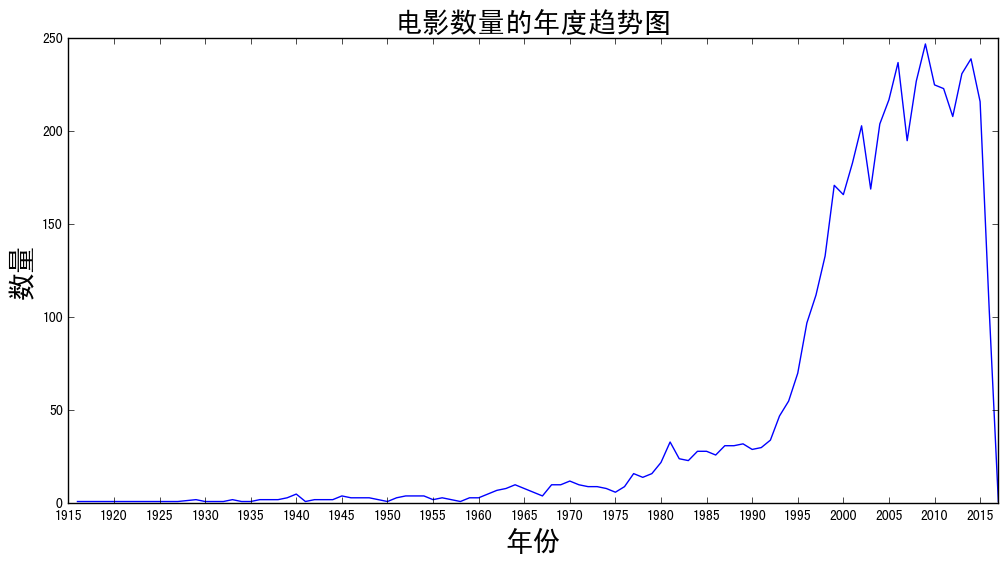

In [51]:
df_gy.groupby('release_year').count().Adventure.plot(figsize=(12, 6))
plt.xticks(range(1915, 2018, 5))
plt.title(u'电影数量的年度趋势图', fontsize=20)
plt.xlabel(u'年份', fontsize=20)
plt.ylabel(u'数量', fontsize=20)
plt.show()

**可以看出电影的拍摄数量是从 1992 年开始大幅增加的**

In [37]:
df_gy1 = df_gy.sort_index(ascending=False)  #根据索引年份排序
df_gy1.head()

,Comedy,War,Action,Science Fiction,Family,History,Adventure,Crime,Western,Mystery,Thriller,TV Movie,Music,Drama,Romance,Fantasy,Horror,Animation,Foreign,Documentary
release_year,,,,,,,,,,,,,,,,,,,,
2017,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2016,0,1,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2016,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
2016,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0
2016,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0


- 每个类型每年的数量

In [38]:
df_gys = df_gy1.groupby('release_year').sum()#计算每个类型每年的数量
df_gys.tail()

,Comedy,War,Action,Science Fiction,Family,History,Adventure,Crime,Western,Mystery,Thriller,TV Movie,Music,Drama,Romance,Fantasy,Horror,Animation,Foreign,Documentary
release_year,,,,,,,,,,,,,,,,,,,,
2013,71,3,56,27,22,8,36,37,1,5,53,2,12,110,25,21,25,17,0,10
2014,62,10,54,26,23,7,37,27,3,15,66,0,9,110,24,16,21,14,0,7
2015,52,2,46,28,17,9,35,26,7,20,67,0,8,95,23,10,33,13,0,7
2016,26,3,39,11,9,6,23,10,1,6,27,0,1,37,9,13,20,4,0,0
2017,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0


- 电影类型随时间变化的趋势（折线图）

In [69]:
# 获取所有的自带样式
print(plt.style.available)
 
# 使用自带的样式进行美化
#plt.style.use("ggplot")
#plt.style.use('seaborn-white')

['seaborn-pastel', 'dark_background', 'seaborn-whitegrid', 'seaborn-paper', 'grayscale', 'ggplot', 'seaborn-dark', 'seaborn-ticks', 'seaborn-bright', 'fivethirtyeight', 'seaborn-muted', 'bmh', 'seaborn-talk', 'seaborn-notebook', 'seaborn-deep', 'seaborn-colorblind', 'seaborn-dark-palette', 'seaborn-white', 'seaborn-darkgrid', 'classic', 'seaborn-poster']


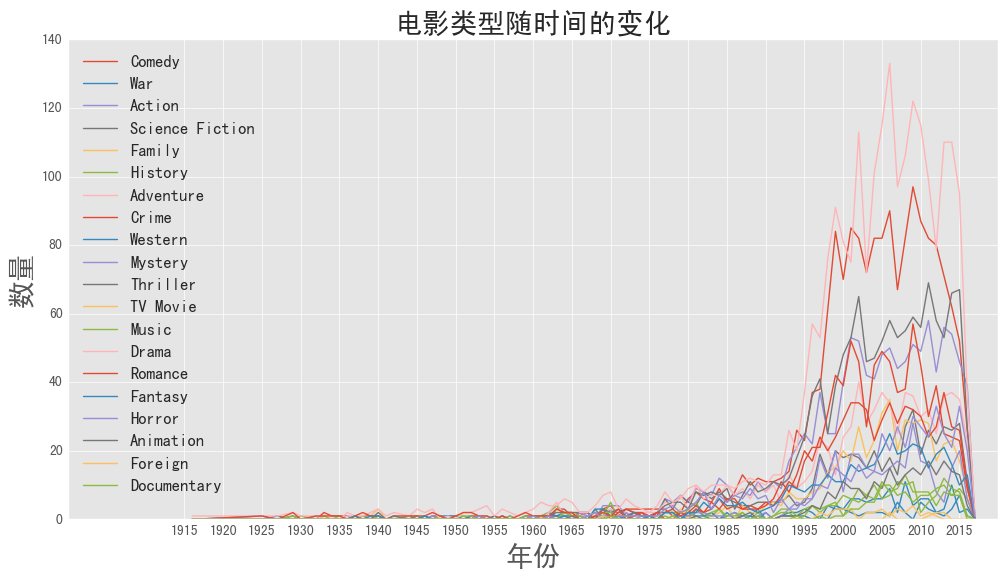

In [73]:
plt.figure(figsize=(12, 6))  #画布大小
plt.plot(df_gys, label=df_gys.columns)  #多个折线
plt.legend(df_gys, loc='best')
plt.xticks(range(1915, 2018, 5))  #刻度间隔
plt.title(u'电影类型随时间的变化', fontsize=20)
plt.xlabel(u'年份', fontsize=20)
plt.ylabel(u'数量', fontsize=20)
plt.show()

**可以看出 Drama 和 War 这两个类型是随时间波动比较大的，增长较快，现在仍比较热门**

- 电影类型的数量关系（各个类型的总数量）


In [78]:
# 计算各类型的电影总数量
pd.set_option('display.max_rows', 20)

df_gysum = df_gys.sum().sort_values(ascending=True)
df_gysum

TV Movie              8
Foreign              34
Western              82
Documentary         110
War                 144
Music               185
History             197
Animation           234
Mystery             348
Fantasy             424
Family              513
Horror              519
Science Fiction     535
Crime               696
Adventure           790
Romance             894
Action             1154
Thriller           1274
Comedy             1722
Drama              2297
dtype: int64

- 各个电影类型的数量条形图

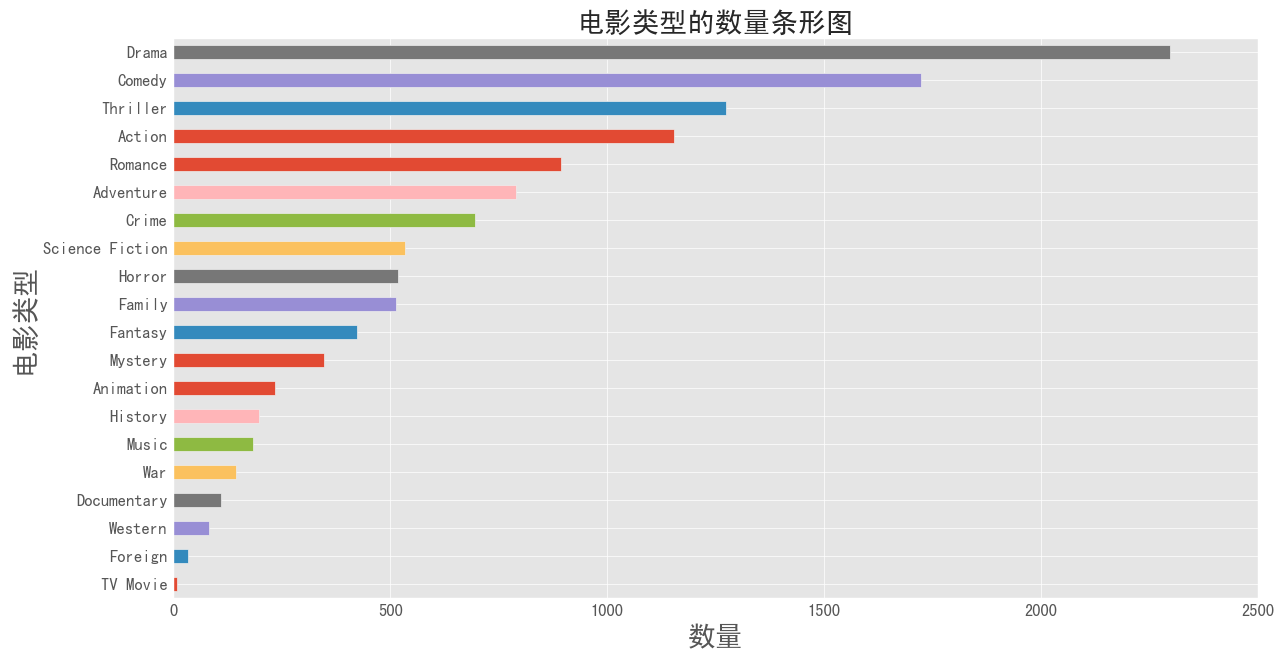

In [94]:
df_gysum.plot.barh(label='genre', figsize=(14, 7), fontsize=12)
plt.title(u'电影类型的数量条形图', fontsize=20)
plt.xlabel(u'数量', fontsize=20)
plt.ylabel(u'电影类型', fontsize=20)
plt.show()

**可以看出 Drama 和 Comedy 是数量最多的前两个**

- 各个电影类型的比例饼图

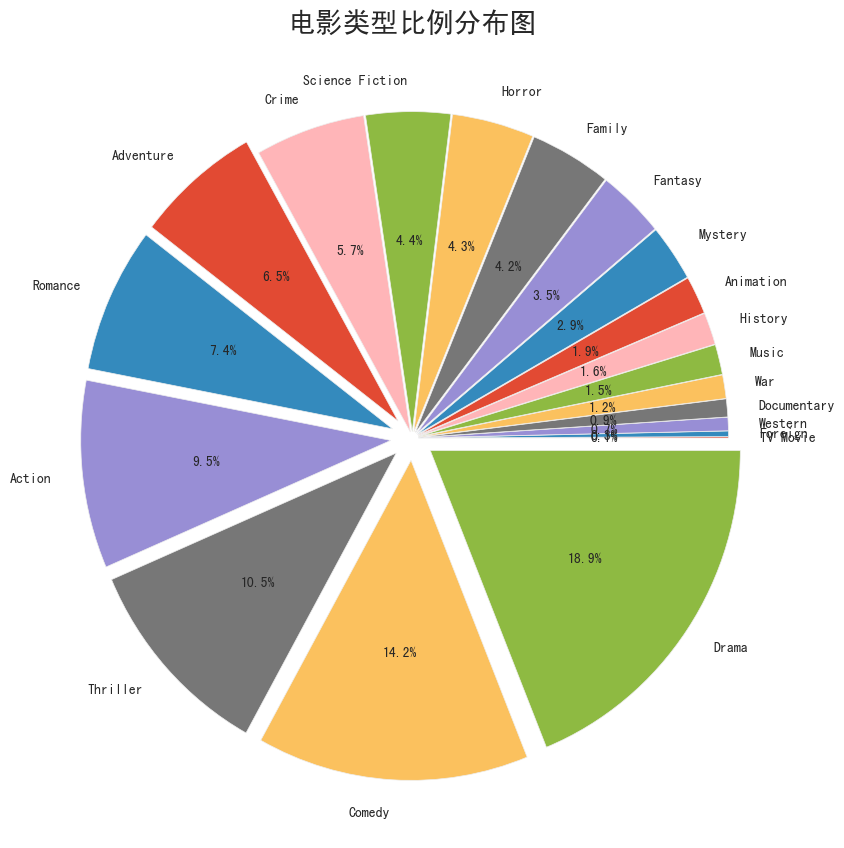

In [95]:
# 计算各种类型所占比例
bl = df_gysum / df_gysum.sum()
# 所占比例大于等于 0.06 时，往外高出一点
explode = (bl >= 0.06) / 20 + 0.02
# 设置饼图参数
df_gysum.plot.pie(autopct='%1.1f%%', figsize=(10,10), label='', explode=explode)
plt.title(u'电影类型比例分布图', fontsize=20)
plt.show()

**Drama、Comedy、Thriller、Action 这四个类型占了一半多比例，分别为 18.9%，14.2%，10.5%，9.5%**

**4. 电影类型与利润的关系**

In [96]:
df.revenue.describe()

count    4.803000e+03
mean     8.226064e+07
std      1.628571e+08
min      0.000000e+00
25%      0.000000e+00
50%      1.917000e+07
75%      9.291719e+07
max      2.787965e+09
Name: revenue, dtype: float64

In [97]:
df.budget.describe()

count    4.803000e+03
mean     2.904504e+07
std      4.072239e+07
min      0.000000e+00
25%      7.900000e+05
50%      1.500000e+07
75%      4.000000e+07
max      3.800000e+08
Name: budget, dtype: float64

- 电影类型与利润的关系

In [98]:
# 定义利润
df['profit'] = df['revenue'] - df['budget']

In [99]:
# 把电影类型作为索引
df_gen_pro = pd.DataFrame(index=genre)

In [100]:
# 求出每种类型的平均利润
list = []  #建立一个列表

# 创建一个循环  list.append（）方法用于在列表末尾添加新的对象
for genr in genre:
    list.append(df.groupby(genr)['profit'].mean())
    
list2=[]
#range(len(list_1))遍历一个list
for i in range(len(genre)):
    list2.append(list[i][1])
df_gen_pro['mean_profit'] = list2

In [101]:
df_gen_pro.head()

,mean_profit
Comedy,4.597608e+07
War,4.887342e+07
Action,8.970235e+07
Science Fiction,1.005910e+08
Family,1.116260e+08


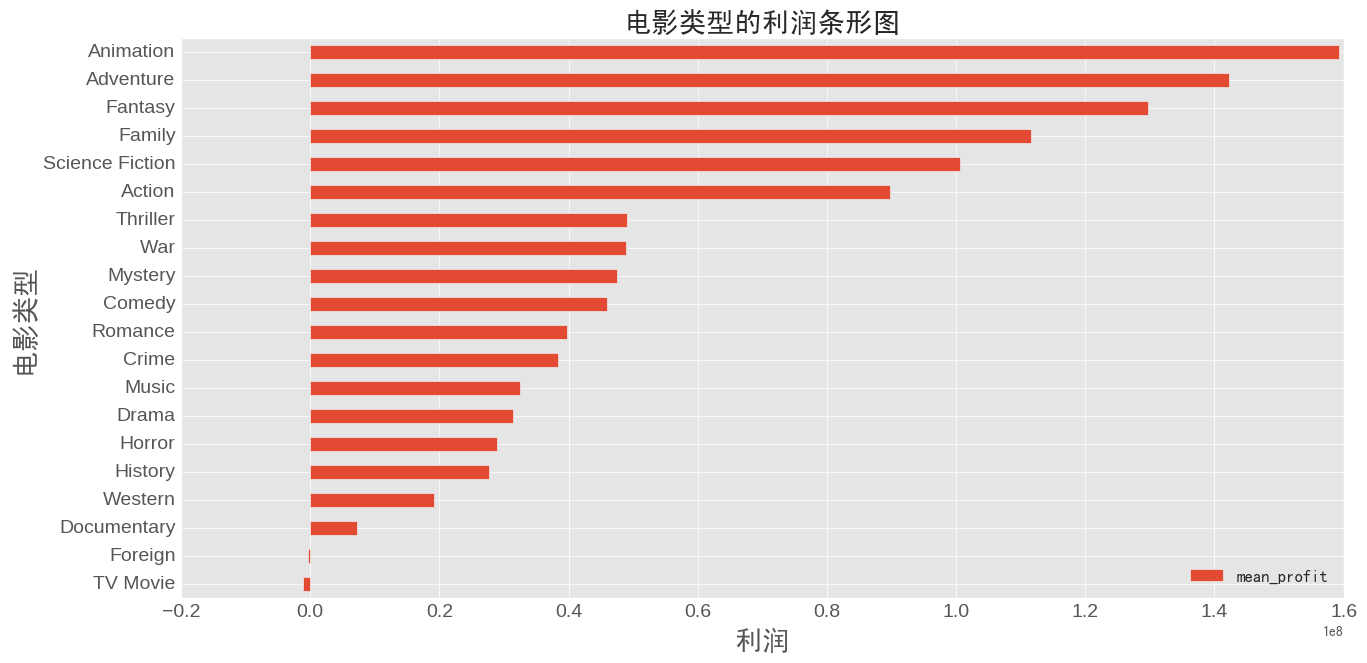

In [103]:
df_gen_pro.sort_values(by='mean_profit', ascending=True).plot.barh(label='genre', figsize=(15,7), fontsize=14)
plt.title(u'电影类型的利润条形图', fontsize=20)
plt.xlabel(u'利润', fontsize=20)
plt.ylabel(u'电影类型', fontsize=20)
plt.grid(True)
plt.show()

**可以看出 Animation 和 Advanture, Fantasy 这三个类型的电影是盈利最好的，而 Foreign 和 TV Movie 这两个是会亏损的**

- 观众更喜欢哪种类型的电影

In [104]:
df_gen_popu = pd.DataFrame(index=genre)

#求出每种类型的平均利润
list = []  #建立一个列表
#创建一个循环  list.append（）方法用于在列表末尾添加新的对象
for genr in genre:
    list.append(df.groupby(genr)['popularity'].mean())
    
list2=[]
#range(len(list_1))遍历一个list
for i in range(len(genre)):
    list2.append(list[i][1])
df_gen_popu['mean_popularity'] = list2
df_gen_popu.head()

,mean_popularity
Comedy,18.221001
War,23.777289
Action,30.940382
Science Fiction,36.451806
Family,27.832849


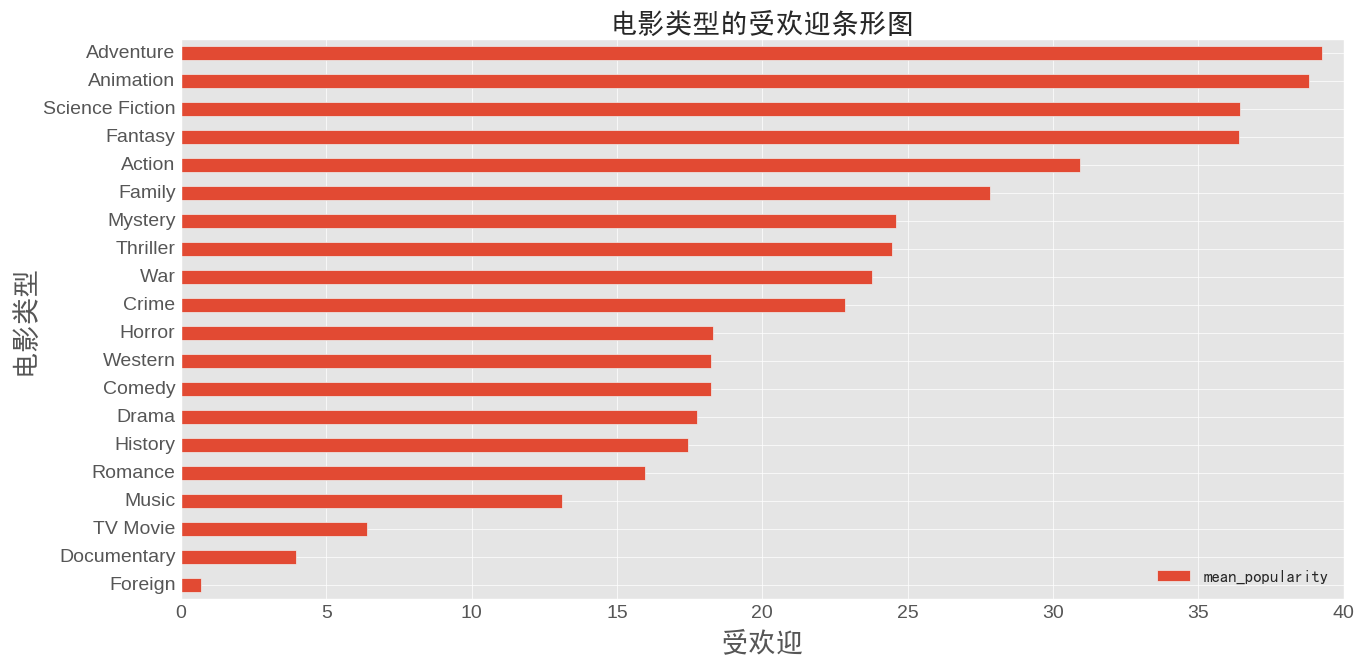

In [105]:
df_gen_popu.sort_values(by='mean_popularity', ascending=True).plot.barh(label='genre', figsize=(15,7), fontsize=14)
plt.title(u'电影类型的受欢迎条形图', fontsize=20)
plt.xlabel(u'受欢迎', fontsize=20)
plt.ylabel(u'电影类型', fontsize=20)
plt.grid(True)
plt.show()

**可以看出观众最喜欢的四中类型是 Adventure、Animation、Science Fiction、Fantasy**

### 4.2 电影票房与哪些因素相关，电影受欢迎程度的分析

- 每年的票房统计

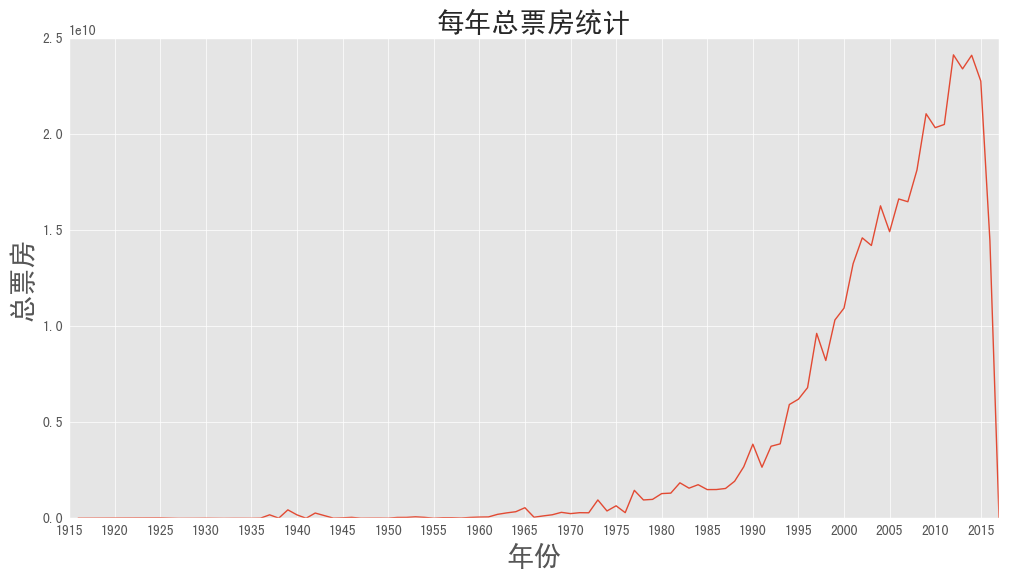

In [122]:
df_revenue = df.groupby('release_year')['revenue'].sum()
df_revenue.plot(figsize=(12, 6))
plt.xticks(range(1915, 2018, 5))
plt.title(u'每年总票房统计', fontsize=20)
plt.xlabel(u'年份', fontsize=20)
plt.ylabel(u'总票房', fontsize=20)
plt.show()

**电影的票房也是从 1992 开始大幅度增长的**

- 电影预算与票房的关系

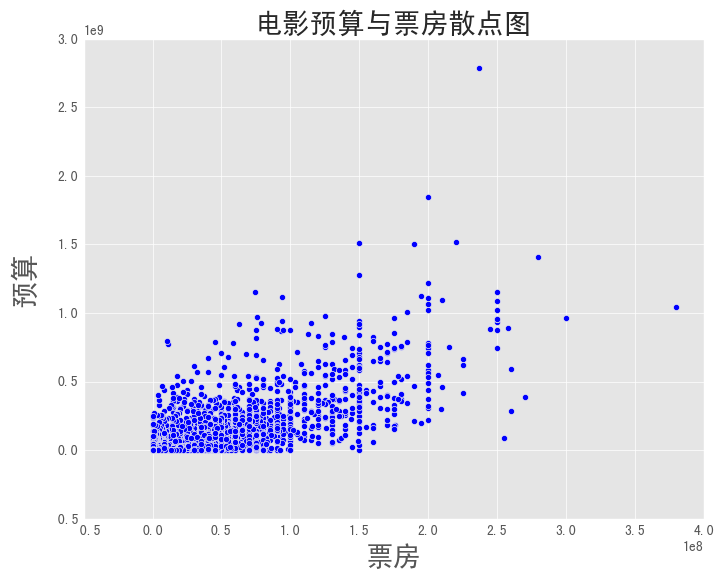

In [123]:
plt.scatter(x=df.budget, y=df.revenue)
plt.xlabel(u'票房', fontsize=20)
plt.ylabel(u'预算', fontsize=20)
plt.title(u'电影预算与票房散点图', fontsize=20)
plt.show()

**可以看出票房和预算是正相关性的，预算越高票房也越高，除去一些极值**

- 电影评分与票房的关系

In [124]:
df.vote_average.describe()

count    4803.000000
mean        6.092172
std         1.194612
min         0.000000
25%         5.600000
50%         6.200000
75%         6.800000
max        10.000000
Name: vote_average, dtype: float64

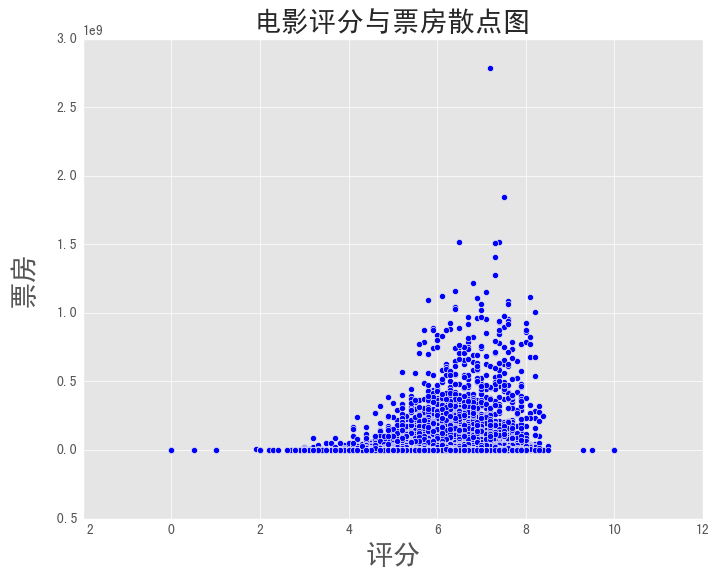

In [125]:
plt.scatter(x=df.vote_average, y=df.revenue)
plt.xlabel(u'评分', fontsize=20)
plt.ylabel(u'票房', fontsize=20)
plt.title(u'电影评分与票房散点图', fontsize=20)
plt.show()

**可以看出评分跟票房的相关性不是很强，评分跟票房大都集中在一个区域**

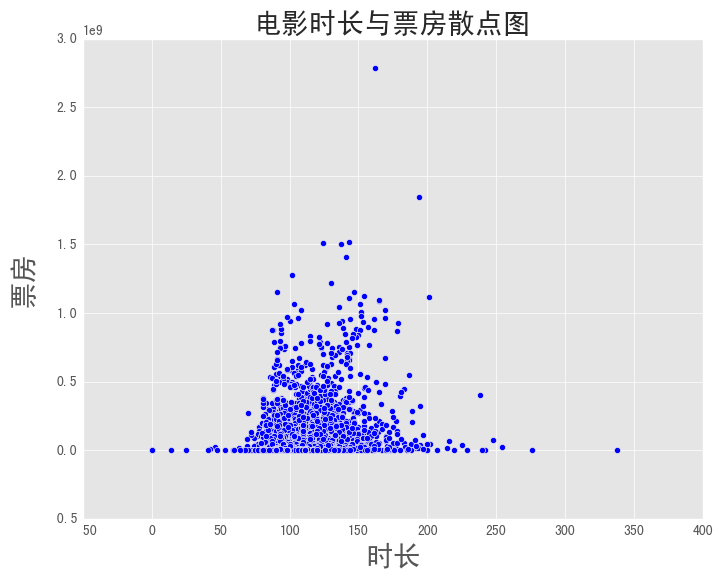

In [126]:
plt.scatter(x=df.runtime, y=df.revenue)
plt.xlabel(u'时长', fontsize=20)
plt.ylabel(u'票房', fontsize=20)
plt.title(u'电影时长与票房散点图', fontsize=20)
plt.show()

- 评分与受欢迎的关系

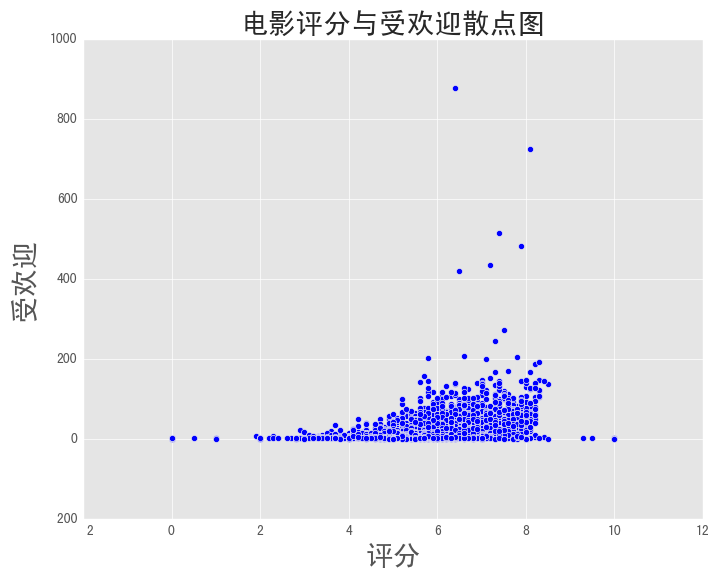

In [127]:
plt.scatter(x=df.vote_average, y=df.popularity)
plt.xlabel('评分', fontsize=20)
plt.ylabel('受欢迎', fontsize=20)
plt.title('电影评分与受欢迎散点图', fontsize=20)
plt.show()

**评分与受欢迎之间相关性不是很明显，但是大部分受欢迎度高的，基本是评分高的**

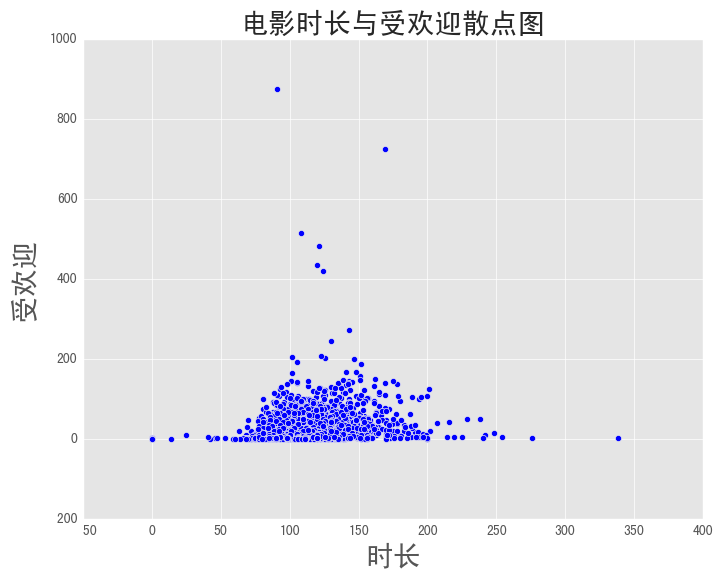

In [128]:
plt.scatter(x=df.runtime, y=df.popularity)
plt.xlabel(u'时长', fontsize=20)
plt.ylabel(u'受欢迎', fontsize=20)
plt.title(u'电影时长与受欢迎散点图', fontsize=20)
plt.show()

**观众喜欢的电影时长大多是 90-160 分钟**

### 4.3 Universal Pictures 和 Paramount Pictures 这两个公司产出电影的情况对比

In [129]:
# 提取这两个公司
df['Universal Pictures'] = df['production_companies'].str.contains('Universal Pictures').apply(lambda x:1 if x else 0)

# 包含 Universal Pictures 的则显示 1
df['Paramount Picture'] = df['production_companies'].str.contains('Paramount Picture').apply(lambda x:1 if x else 0)


In [130]:
df.head()

,movie_id,title,cast,director,budget,genres,keywords,original_language,popularity,production_companies,production_countries,release_date,revenue,runtime,status,vote_average,vote_count,release_year,release_month,Comedy,War,Action,Science Fiction,Family,History,Adventure,Crime,Western,Mystery,Thriller,TV Movie,Music,Drama,Romance,Fantasy,Horror,Animation,Foreign,Documentary,profit,Universal Pictures,Paramount Picture
0,19995,Avatar,"Sam Worthington,Zoe Saldana,Sigourney Weaver,S...",James Cameron,237000000,"Action,Adventure,Fantasy,Science Fiction","culture clash,future,space war,space colony,so...",en,150.437577,"Ingenious Film Partners,Twentieth Century Fox ...","United States of America,United Kingdom",2009-12-10,2787965087,162.0,Released,7.2,11800,2009,12,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,2550965087,0,0
1,285,Pirates of the Caribbean: At World's End,"Johnny Depp,Orlando Bloom,Keira Knightley,Stel...",Gore Verbinski,300000000,"Adventure,Fantasy,Action","ocean,drug abuse,exotic island,east india trad...",en,139.082615,"Walt Disney Pictures,Jerry Bruckheimer Films,S...",United States of America,2007-05-19,961000000,169.0,Released,6.9,4500,2007,5,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,661000000,0,0
2,206647,Spectre,"Daniel Craig,Christoph Waltz,Léa Seydoux,Ralph...",Sam Mendes,245000000,"Action,Adventure,Crime","spy,based on novel,secret agent,sequel,mi6,bri...",en,107.376788,"Columbia Pictures,Danjaq,B24","United Kingdom,United States of America",2015-10-26,880674609,148.0,Released,6.3,4466,2015,10,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,635674609,0,0
3,49026,The Dark Knight Rises,"Christian Bale,Michael Caine,Gary Oldman,Anne ...",Christopher Nolan,250000000,"Action,Crime,Drama,Thriller","dc comics,crime fighter,terrorist,secret ident...",en,112.312950,"Legendary Pictures,Warner Bros.,DC Entertainme...",United States of America,2012-07-16,1084939099,165.0,Released,7.6,9106,2012,7,0,0,1,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,834939099,0,0
4,49529,John Carter,"Taylor Kitsch,Lynn Collins,Samantha Morton,Wil...",Andrew Stanton,260000000,"Action,Adventure,Science Fiction","based on novel,mars,medallion,space travel,pri...",en,43.926995,Walt Disney Pictures,United States of America,2012-03-07,284139100,132.0,Released,6.1,2124,2012,3,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,24139100,0,0


In [131]:
# 计算两个公司的利润
df['Universal_profit'] = df['Universal Pictures'] * df['profit']
df['Paramount_profit'] = df['Paramount Picture'] * df['profit']

In [132]:
# 计算两个公司的票房
df['Universal_revenue'] = df['Universal Pictures'] * df['revenue']
df['Paramount_revenue'] = df['Paramount Picture'] * df['revenue']

In [133]:
df.head()

,movie_id,title,cast,director,budget,genres,keywords,original_language,popularity,production_companies,production_countries,release_date,revenue,runtime,status,vote_average,vote_count,release_year,release_month,Comedy,War,Action,Science Fiction,Family,History,Adventure,Crime,Western,Mystery,Thriller,TV Movie,Music,Drama,Romance,Fantasy,Horror,Animation,Foreign,Documentary,profit,Universal Pictures,Paramount Picture,Universal_profit,Paramount_profit,Universal_revenue,Paramount_revenue
0,19995,Avatar,"Sam Worthington,Zoe Saldana,Sigourney Weaver,S...",James Cameron,237000000,"Action,Adventure,Fantasy,Science Fiction","culture clash,future,space war,space colony,so...",en,150.437577,"Ingenious Film Partners,Twentieth Century Fox ...","United States of America,United Kingdom",2009-12-10,2787965087,162.0,Released,7.2,11800,2009,12,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,2550965087,0,0,0,0,0,0
1,285,Pirates of the Caribbean: At World's End,"Johnny Depp,Orlando Bloom,Keira Knightley,Stel...",Gore Verbinski,300000000,"Adventure,Fantasy,Action","ocean,drug abuse,exotic island,east india trad...",en,139.082615,"Walt Disney Pictures,Jerry Bruckheimer Films,S...",United States of America,2007-05-19,961000000,169.0,Released,6.9,4500,2007,5,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,661000000,0,0,0,0,0,0
2,206647,Spectre,"Daniel Craig,Christoph Waltz,Léa Seydoux,Ralph...",Sam Mendes,245000000,"Action,Adventure,Crime","spy,based on novel,secret agent,sequel,mi6,bri...",en,107.376788,"Columbia Pictures,Danjaq,B24","United Kingdom,United States of America",2015-10-26,880674609,148.0,Released,6.3,4466,2015,10,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,635674609,0,0,0,0,0,0
3,49026,The Dark Knight Rises,"Christian Bale,Michael Caine,Gary Oldman,Anne ...",Christopher Nolan,250000000,"Action,Crime,Drama,Thriller","dc comics,crime fighter,terrorist,secret ident...",en,112.312950,"Legendary Pictures,Warner Bros.,DC Entertainme...",United States of America,2012-07-16,1084939099,165.0,Released,7.6,9106,2012,7,0,0,1,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,834939099,0,0,0,0,0,0
4,49529,John Carter,"Taylor Kitsch,Lynn Collins,Samantha Morton,Wil...",Andrew Stanton,260000000,"Action,Adventure,Science Fiction","based on novel,mars,medallion,space travel,pri...",en,43.926995,Walt Disney Pictures,United States of America,2012-03-07,284139100,132.0,Released,6.1,2124,2012,3,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,24139100,0,0,0,0,0,0


- 两家公司电影数量对比

In [134]:
# 计算两个公司的电影总数
companiesup = [df['Universal Pictures'].sum(),df['Paramount Picture'].sum()]
companiesup

[314, 285]

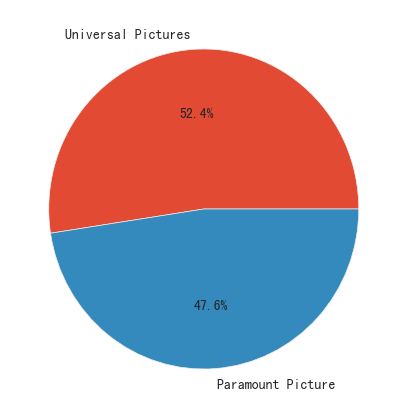

In [135]:
# 两个公司的电影比例图
pd.Series(companiesup,index=['Universal Pictures','Paramount Picture']).plot.pie(autopct='%1.1f%%',figsize=(5,5),label='')

**这两个公司拍摄的电影是差不多的**

- 两家公司的电影岁时间变化的趋势对比

In [136]:
# 选取有关这两个公司的数据
companydf = df[['release_year','Universal Pictures','Paramount Picture','Universal_profit','Paramount_profit','Universal_revenue',
              'Paramount_revenue']]
companydf.head()

,release_year,Universal Pictures,Paramount Picture,Universal_profit,Paramount_profit,Universal_revenue,Paramount_revenue
0,2009,0,0,0,0,0,0
1,2007,0,0,0,0,0,0
2,2015,0,0,0,0,0,0
3,2012,0,0,0,0,0,0
4,2012,0,0,0,0,0,0


In [137]:
companydf1 = companydf.sort_index()
companydf1.head()

,release_year,Universal Pictures,Paramount Picture,Universal_profit,Paramount_profit,Universal_revenue,Paramount_revenue
0,2009,0,0,0,0,0,0
1,2007,0,0,0,0,0,0
2,2015,0,0,0,0,0,0
3,2012,0,0,0,0,0,0
4,2012,0,0,0,0,0,0


In [139]:
# 按年份分计算总额
pd.set_option('display.max_rows', 8)

companydf2 = companydf1.groupby('release_year').sum()
companydf2

,Universal Pictures,Paramount Picture,Universal_profit,Paramount_profit,Universal_revenue,Paramount_revenue
release_year,,,,,,
1916,0,0,0,0,0,0
1925,0,0,0,0,0,0
1927,0,1,0,-91969578,0,650422
1929,0,0,0,0,0,0
...,...,...,...,...,...,...
2014,10,8,962619293,2154917115,1220619293,2964917115
2015,13,7,3371752734,1372223243,4004752734,1855223243
2016,10,5,1720591078,375854766,2274591078,860854766
2017,0,0,0,0,0,0


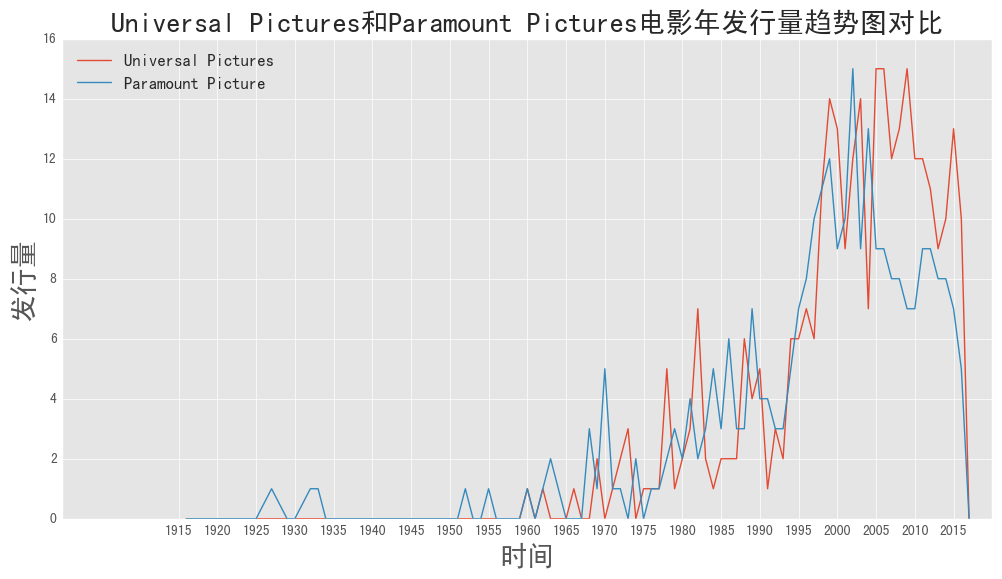

In [142]:
# 画图
plt.figure(figsize=(12, 6))
# 两条折线
plt.plot(companydf2.index, companydf2['Universal Pictures'], label=companydf2['Universal Pictures'])
plt.plot(companydf2.index, companydf2['Paramount Picture'], label=companydf2['Paramount Picture'])
plt.xticks(range(1915, 2018, 5))
plt.title(u'Universal Pictures和Paramount Pictures电影年发行量趋势图对比', fontsize=20)
plt.xlabel(u'时间', fontsize=20)
plt.ylabel(u'发行量', fontsize=20)
#图标
plt.grid(True)
plt.legend(['Universal Pictures', 'Paramount Picture'], loc='best')
plt.show()

**可以看出随着时间的推移，Universal Pictures 和 Paramount Pictures 公司的电影发行量呈现出增长趋势，尤其是在 1992 年后增长迅速**

- 两个公司的利润对比

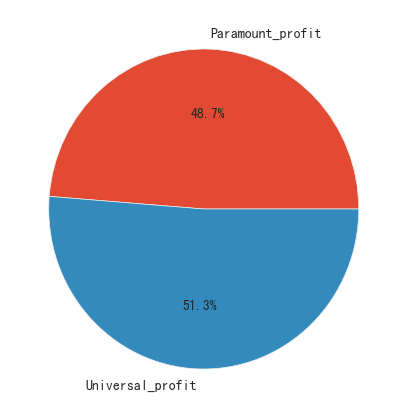

In [143]:
# 两个公司的总利润
Uni_profit = companydf1['Universal_profit'].sum()
Para_profit = companydf1['Paramount_profit'].sum()
profit_two = pd.Series({'Universal_profit':Uni_profit, 'Paramount_profit':Para_profit})
profit_two
#两个公司的利润比例图
profit_two.plot.pie(autopct='%1.1f%%', figsize=(5,5), label='')

### 4.4 对电影导演，突出关键字，电影时长，电影产出地的情况进行分析

- 对电影的导演进行分析

In [144]:
direct=df['director'].value_counts()

In [145]:
direct.describe()

count    2349.000000
mean        2.031928
std         2.100398
min         1.000000
25%         1.000000
50%         1.000000
75%         2.000000
max        27.000000
Name: director, dtype: float64

In [147]:
direct1=direct[:20]

- 导演的拍摄数

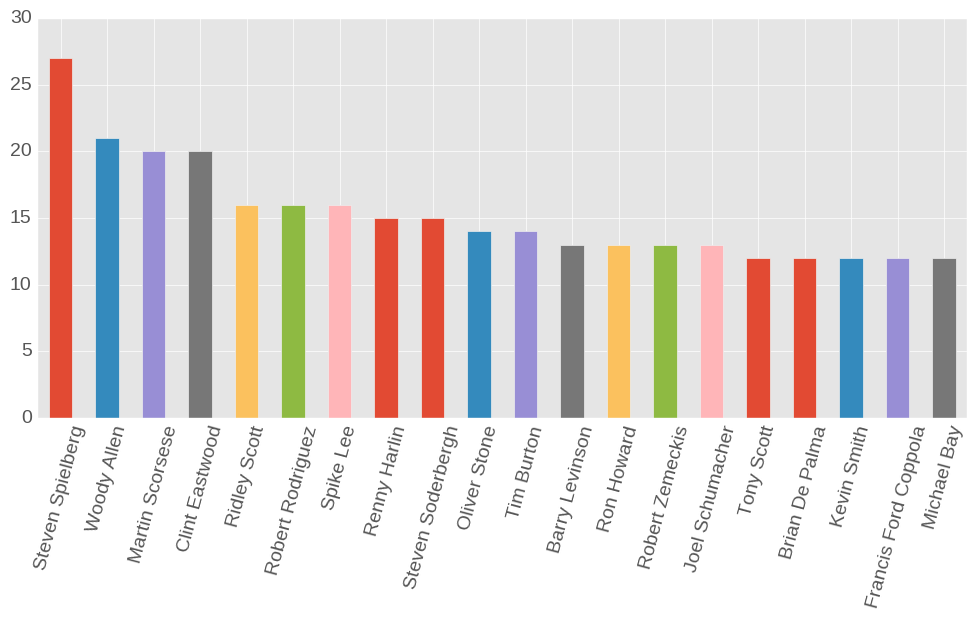

In [156]:
direct1.plot.bar(figsize=(12,5), fontsize=14, rot=75)

**票房最高的三位导演是 Chris Buck、Kyle Balda、Lee Unkrich**

- 关键字分析

In [157]:
# 建立一个列表
keywords_list = []
for i in df['keywords']:
    keywords_list.append(i)
    keywords_list
    
# 把字符串列表连接成一个长字符串
lis = ''.join(keywords_list)

# 使用空格替换中间多余的字符串'\'s'
lis.replace('\'s','')

'culture clash,future,space war,space colony,society,space travel,futuristic,romance,space,alien,tribe,alien planet,cgi,marine,soldier,battle,love affair,anti war,power relations,mind and soul,3docean,drug abuse,exotic island,east india trading company,love of one life,traitor,shipwreck,strong woman,ship,alliance,calypso,afterlife,fighter,pirate,swashbuckler,aftercreditsstingerspy,based on novel,secret agent,sequel,mi6,british secret service,united kingdomdc comics,crime fighter,terrorist,secret identity,burglar,hostage drama,time bomb,gotham city,vigilante,cover-up,superhero,villainess,tragic hero,terrorism,destruction,catwoman,cat burglar,imax,flood,criminal underworld,batmanbased on novel,mars,medallion,space travel,princess,alien,steampunk,martian,escape,edgar rice burroughs,alien race,superhuman strength,mars civilization,sword and planet,19th century,3ddual identity,amnesia,sandstorm,love of one life,forgiveness,spider,wretch,death of a friend,egomania,sand,narcism,hostility,marv

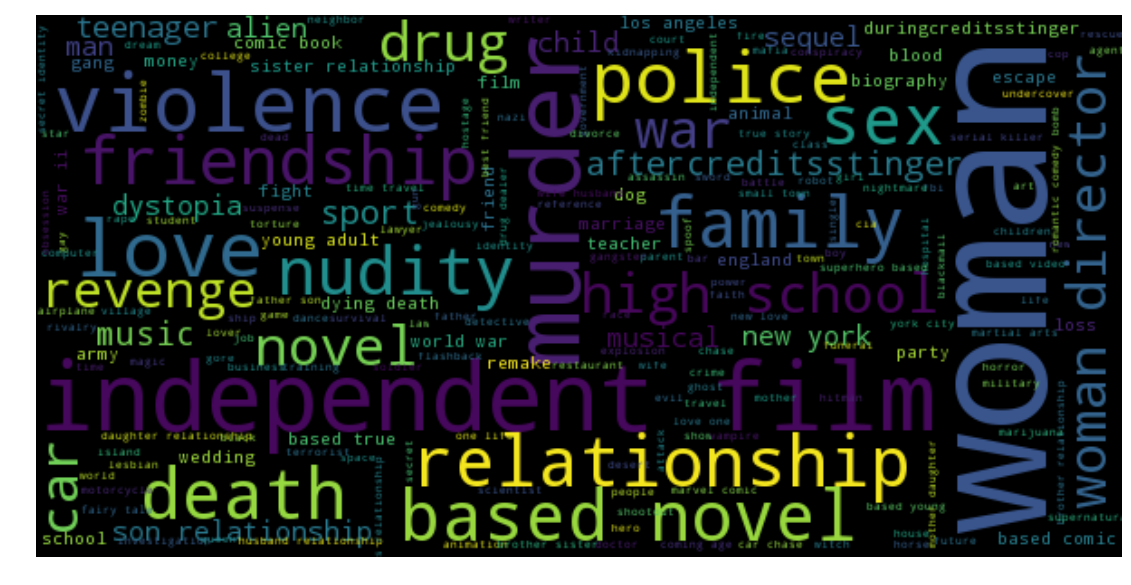

In [158]:
# 制作词云图
wc = WordCloud(background_color='black',  #背景颜色
             max_words=3000,              #显示最大词数
             scale=1.5).generate(lis)     # https://blog.csdn.net/u010309756/article/details/67637930
plt.figure(figsize=(14,7))
plt.imshow(wc)     #显示图片
plt.axis('off')
plt.show()

**可以看出关键字显示的主要是 independent film、woman、murder 这些字段**

- 电影时长的分析

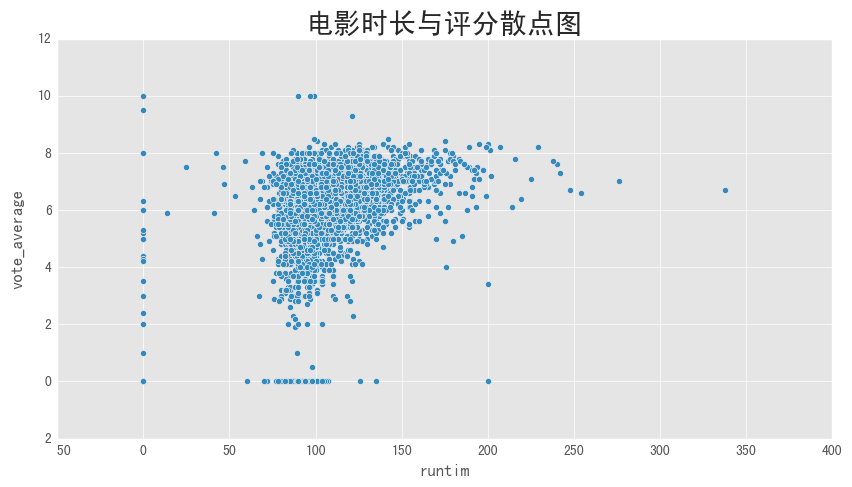

In [159]:
df.plot.scatter(x='runtime', y='vote_average', figsize=(10,5))
plt.xlabel('runtim')
plt.ylabel('vote_average')
plt.title(u'电影时长与评分散点图', fontsize=20)
plt.grid(True)
plt.show()

**可以看出评分较高的电影时长集中于 80-150 分钟之间**

- 电影产地分析

In [160]:
df.production_countries

0       United States of America,United Kingdom
1                      United States of America
2       United Kingdom,United States of America
3                      United States of America
                         ...                   
4799                                           
4800                   United States of America
4801             United States of America,China
4802                   United States of America
Name: production_countries, Length: 4803, dtype: object

In [161]:
df.head()

,movie_id,title,cast,director,budget,genres,keywords,original_language,popularity,production_companies,production_countries,release_date,revenue,runtime,status,vote_average,vote_count,release_year,release_month,Comedy,War,Action,Science Fiction,Family,History,Adventure,Crime,Western,Mystery,Thriller,TV Movie,Music,Drama,Romance,Fantasy,Horror,Animation,Foreign,Documentary,profit,Universal Pictures,Paramount Picture,Universal_profit,Paramount_profit,Universal_revenue,Paramount_revenue
0,19995,Avatar,"Sam Worthington,Zoe Saldana,Sigourney Weaver,S...",James Cameron,237000000,"Action,Adventure,Fantasy,Science Fiction","culture clash,future,space war,space colony,so...",en,150.437577,"Ingenious Film Partners,Twentieth Century Fox ...","United States of America,United Kingdom",2009-12-10,2787965087,162.0,Released,7.2,11800,2009,12,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,2550965087,0,0,0,0,0,0
1,285,Pirates of the Caribbean: At World's End,"Johnny Depp,Orlando Bloom,Keira Knightley,Stel...",Gore Verbinski,300000000,"Adventure,Fantasy,Action","ocean,drug abuse,exotic island,east india trad...",en,139.082615,"Walt Disney Pictures,Jerry Bruckheimer Films,S...",United States of America,2007-05-19,961000000,169.0,Released,6.9,4500,2007,5,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,661000000,0,0,0,0,0,0
2,206647,Spectre,"Daniel Craig,Christoph Waltz,Léa Seydoux,Ralph...",Sam Mendes,245000000,"Action,Adventure,Crime","spy,based on novel,secret agent,sequel,mi6,bri...",en,107.376788,"Columbia Pictures,Danjaq,B24","United Kingdom,United States of America",2015-10-26,880674609,148.0,Released,6.3,4466,2015,10,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,635674609,0,0,0,0,0,0
3,49026,The Dark Knight Rises,"Christian Bale,Michael Caine,Gary Oldman,Anne ...",Christopher Nolan,250000000,"Action,Crime,Drama,Thriller","dc comics,crime fighter,terrorist,secret ident...",en,112.312950,"Legendary Pictures,Warner Bros.,DC Entertainme...",United States of America,2012-07-16,1084939099,165.0,Released,7.6,9106,2012,7,0,0,1,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,834939099,0,0,0,0,0,0
4,49529,John Carter,"Taylor Kitsch,Lynn Collins,Samantha Morton,Wil...",Andrew Stanton,260000000,"Action,Adventure,Science Fiction","based on novel,mars,medallion,space travel,pri...",en,43.926995,Walt Disney Pictures,United States of America,2012-03-07,284139100,132.0,Released,6.1,2124,2012,3,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,24139100,0,0,0,0,0,0


In [162]:
# 类似于类型的分析
countrys = set()
for i in df['production_countries'].str.split(','):
    countrys = set().union(i, countrys)

In [163]:
countrys.remove('')
countrys

{'Afghanistan',
 'Algeria',
 'Angola',
 'Argentina',
 'Aruba',
 'Australia',
 'Austria',
 'Bahamas',
 'Belgium',
 'Bhutan',
 'Bolivia',
 'Bosnia and Herzegovina',
 'Brazil',
 'Bulgaria',
 'Cambodia',
 'Cameroon',
 'Canada',
 'Chile',
 'China',
 'Colombia',
 'Cyprus',
 'Czech Republic',
 'Denmark',
 'Dominica',
 'Dominican Republic',
 'Ecuador',
 'Egypt',
 'Fiji',
 'Finland',
 'France',
 'Germany',
 'Greece',
 'Guadaloupe',
 'Guyana',
 'Hong Kong',
 'Hungary',
 'Iceland',
 'India',
 'Indonesia',
 'Iran',
 'Ireland',
 'Israel',
 'Italy',
 'Jamaica',
 'Japan',
 'Jordan',
 'Kazakhstan',
 'Kenya',
 'Kyrgyz Republic',
 'Lebanon',
 'Libyan Arab Jamahiriya',
 'Lithuania',
 'Luxembourg',
 'Malaysia',
 'Malta',
 'Mexico',
 'Monaco',
 'Morocco',
 'Netherlands',
 'New Zealand',
 'Nigeria',
 'Norway',
 'Pakistan',
 'Panama',
 'Peru',
 'Philippines',
 'Poland',
 'Portugal',
 'Romania',
 'Russia',
 'Serbia',
 'Serbia and Montenegro',
 'Singapore',
 'Slovakia',
 'Slovenia',
 'South Africa',
 'South Ko

In [164]:
for country in countrys:
    df[country] = df['production_countries'].str.contains(country).apply(lambda x:1 if x else 0)

In [165]:
df_coun = df.loc[:, countrys]#截取genre的数据框
df_coun.index = df['release_year']#以‘release_year’为索引
df_counts = df_coun.sort_index(ascending=False).sum().sort_values(ascending=False)
df_countss = df_counts[df_counts > 10]

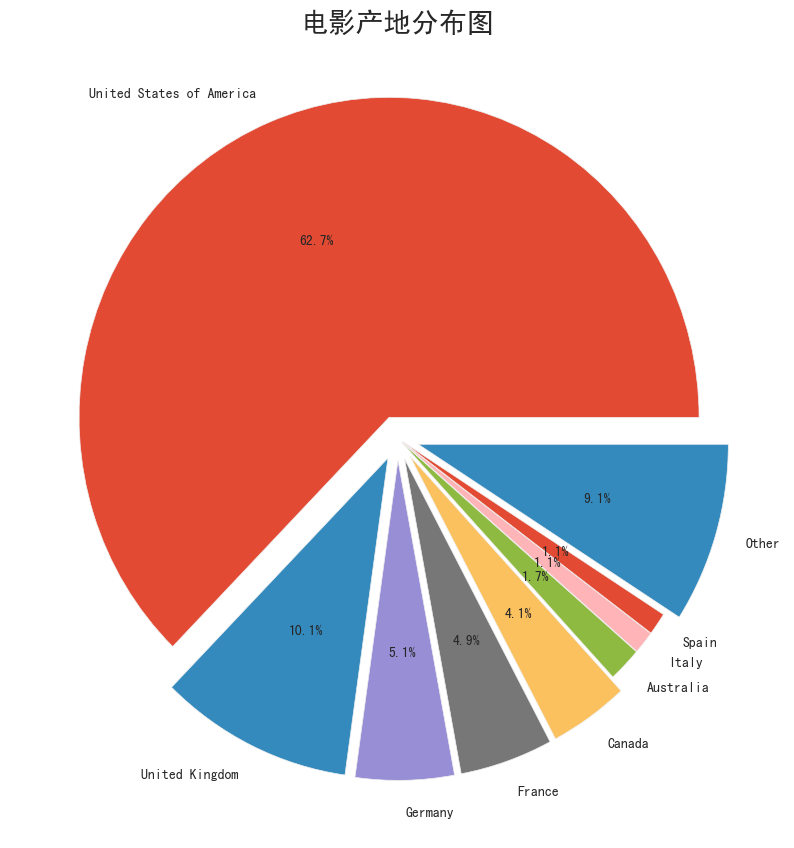

In [166]:
# 计算各个国家所占比例
co = df_countss / df_countss.sum()

# 所占比例大于等于0.04时，往外高出一点
others = 0.01
co1 = co[co >= others]
co1['Other'] = co[co < others].sum()
explode = (co1 >= 0.04) / 20 + 0.02

# 设置饼图参数
co1.plot.pie(autopct='%1.1f%%', figsize=(10,10), explode=explode, label='')
plt.title(u'电影产地分布图', fontsize=20)

**可以看出美国是电影产出大国，超过一半比例**

### 4.5 改编电影与原创电影的分析

- 改编电影与原创电影数量对比

In [167]:
df['based on novel'] = df['keywords'].str.contains('based on novel').apply(lambda x:1 if x else 0)      #改编
df['not based on novel'] = df['keywords'].str.contains('based on novel').apply(lambda x:0 if x else 1)  #原创

In [168]:
novel = df[['release_year','based on novel','not based on novel']]
novel.head()

,release_year,based on novel,not based on novel
0,2009,0,1
1,2007,0,1
2,2015,1,0
3,2012,0,1
4,2012,1,0


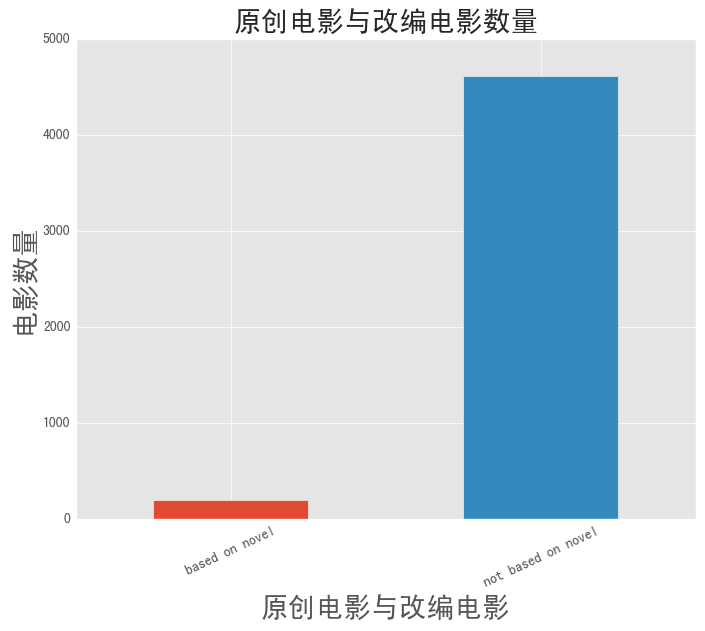

In [172]:
novelsum = [novel['based on novel'].sum(),
novel['not based on novel'].sum()]
novelsums = pd.Series(novelsum, index=['based on novel', 'not based on novel'])
novelsums.plot.bar(rot=25)
plt.xlabel(u'原创电影与改编电影', fontsize=20)
plt.ylabel(u'电影数量', fontsize=20)
plt.title(u'原创电影与改编电影数量', fontsize=20)
plt.show()

In [173]:
df['if_novel'] = df['keywords'].str.contains('based on novel').apply(lambda x:'based on novel' if x else ' not based on novel')

In [174]:
df_novel = df[['if_novel', 'budget', 'revenue', 'profit']]

In [175]:
df_novel1 = df_novel.groupby('if_novel').mean()
df_novel1

,budget,revenue,profit
if_novel,,,
not based on novel,2.834872e+07,7.962815e+07,5.127943e+07
based on novel,4.532546e+07,1.438100e+08,9.848457e+07


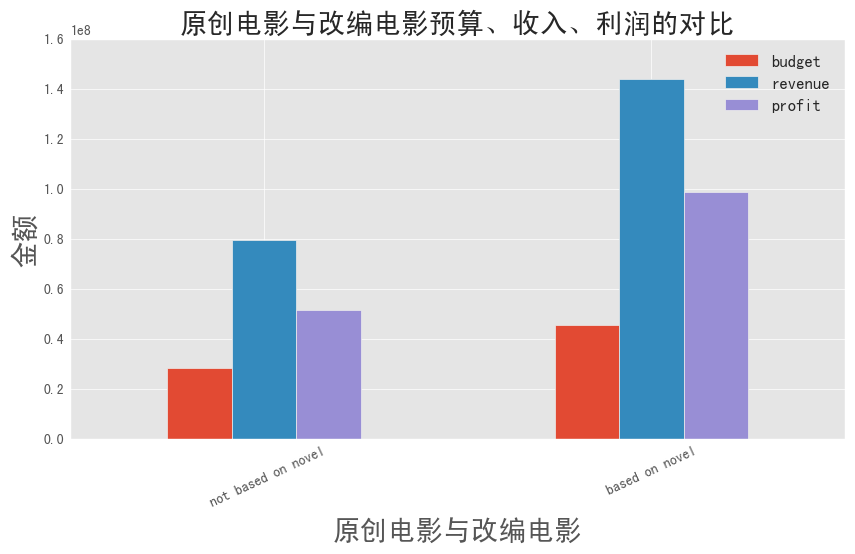

In [179]:
df_novel1.plot.bar(figsize=(10, 5), rot=25)
plt.xlabel(u'原创电影与改编电影', fontsize=20)
plt.ylabel(u'金额', fontsize=20)
plt.title(u'原创电影与改编电影预算、收入、利润的对比', fontsize=20)
plt.show()

**可以看出改编电影的预算略高于原创电影，但改编电影的票房收入和利润远远高于原创电影**